In [1]:

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [18]:
data = pd.read_csv('Social_Network_Ads.csv')
x =data.iloc[:,:-1].values 
y = data.iloc[:,-1].values

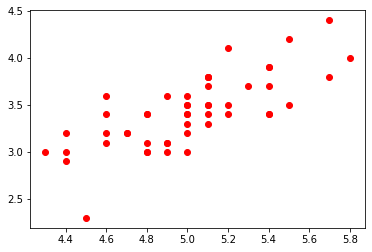

In [19]:
plt.plot(x[y==0][:,0],x[y==0][:,1],'ro')

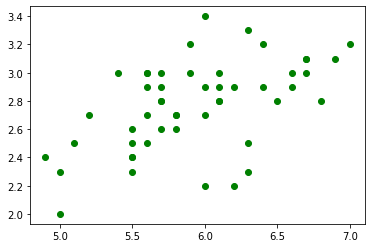

In [20]:
plt.plot(x[y==1][:,0],x[y==1][:,1],'go')

In [3]:
# train test splitting the data set 
from sklearn.model_selection import train_test_split
x_train , x_test , y_tarin , y_test = train_test_split(x,y,test_size = 0.25,random_state= 2)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier(loss = 'log_loss' , learning_rate=0.01,n_estimators=50)

In [5]:
grad_model.fit(x_train, y_tarin)
y_pred = grad_model.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = 'macro')
recall = recall_score(y_test, y_pred,average = 'macro')
print('the accuracy :',accuracy)
print('the precision score :',precision)
print('the recall score :',recall)

the accuracy : 0.83
the precision score : 0.832398316970547
the recall score : 0.8017826825127334


area under the curve is  0.8017826825127334


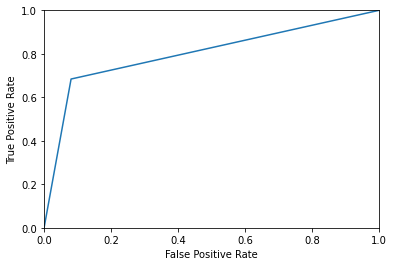

In [6]:
from sklearn import metrics
y_pred = grad_model.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr)
print('area under the curve is ',auc)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()